In [24]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pylab as plt
from datetime import datetime as dt
from numpy import loadtxt

In [19]:
sales = pd.read_csv('sales.csv')
sales.head(10)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
5,687329,674,2,2013-03-19,1016,1,1,0,0,8406
6,600327,659,7,2014-06-08,0,0,0,0,0,0
7,96265,27,3,2014-07-16,1106,1,1,0,1,11162
8,364435,347,6,2013-05-11,448,1,0,0,0,5559
9,163146,288,2,2013-06-25,291,1,0,0,0,3997


In [ ]:
#1 EXPLORING AND CLEANING THE DATA

In [ ]:
sales.shape

(640840, 9)

In [3]:
sales.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [ ]:
sales.describe()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [20]:
#Converting the categorical data into numericals 
sales['state_holiday']=pd.to_numeric(sales['state_holiday'],errors='coerce')
sales

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0.0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0.0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0.0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0.0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0.0,0,10882
...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,2013-10-26,483,1,0,0.0,0,4553
640836,152315,97,1,2014-04-14,987,1,1,0.0,0,12307
640837,117952,987,1,2014-07-07,925,1,0,0.0,0,6800
640838,435829,1084,4,2014-06-12,725,1,0,0.0,0,5344


In [27]:
#convert date into numeric

sales['date_new'] = sales['date'].str.replace('\D', '').astype(int)

sales.drop(['date'],inplace=True,axis=1)

<ipython-input-27-77462d7c78b9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  sales['date_new'] = sales['date'].str.replace('\D', '').astype(int)


In [7]:
sales.head()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,date_new
0,425390,366,4,517,1,0,0.0,0,4422,20130418
1,291687,394,6,694,1,0,0.0,0,8297,20150411
2,411278,807,4,970,1,1,0.0,0,9729,20130829
3,664714,802,2,473,1,1,0.0,0,6513,20130528
4,540835,726,4,1068,1,1,0.0,0,10882,20131010


In [ ]:
sales['date_new'].unique

<bound method Series.unique of 0         20130418
1         20150411
2         20130829
3         20130528
4         20131010
            ...   
640835    20131026
640836    20140414
640837    20140707
640838    20140612
640839    20150503
Name: date_new, Length: 640840, dtype: int64>

In [28]:
sales.dtypes # all numerics now 

Unnamed: 0             int64
store_ID               int64
day_of_week            int64
nb_customers_on_day    int64
open                   int64
promotion              int64
school_holiday         int64
sales                  int64
date_new               int32
dtype: object

In [ ]:
#Dealing with missing values / zeros/ NaN

In [23]:
# a lot of NaN on state_holiday - let's see how many there are
sales['state_holiday'].value_counts()

#all 0 so corr will be 0 - we can drop it 

0.0    621160
Name: state_holiday, dtype: int64

In [25]:
#droping state_holiday
sales.drop(['state_holiday'],inplace=True,axis=1)

In [26]:
sales.isnull().sum()

#no nulls - good

Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
school_holiday         0
sales                  0
dtype: int64

In [ ]:
#2 CHECKING CORRELATION BETWEEN THE VARIABLES

In [29]:
corr = sales.corr() #correlation matrix
corr

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales,date_new
Unnamed: 0,1.000000,-0.001098,-0.000831,-0.000932,0.000083,-0.001569,-0.000319,-0.000880,-0.000203
store_ID,-0.001098,1.000000,0.000329,0.023605,-0.001108,-0.000364,-0.000706,0.004804,-0.000137
day_of_week,-0.000831,0.000329,1.000000,-0.385616,-0.527947,-0.392736,-0.206069,-0.461107,0.002447
nb_customers_on_day,-0.000932,0.023605,-0.385616,1.000000,0.617264,0.315858,0.071085,0.894872,-0.000936
open,0.000083,-0.001108,-0.527947,0.617264,1.000000,0.294936,0.085213,0.678463,-0.001118
promotion,-0.001569,-0.000364,-0.392736,0.315858,0.294936,1.000000,0.066565,0.451819,0.024148
school_holiday,-0.000319,-0.000706,-0.206069,0.071085,0.085213,0.066565,1.000000,0.084484,-0.032965
sales,-0.000880,0.004804,-0.461107,0.894872,0.678463,0.451819,0.084484,1.000000,0.024888
date_new,-0.000203,-0.000137,0.002447,-0.000936,-0.001118,0.024148,-0.032965,0.024888,1.000000


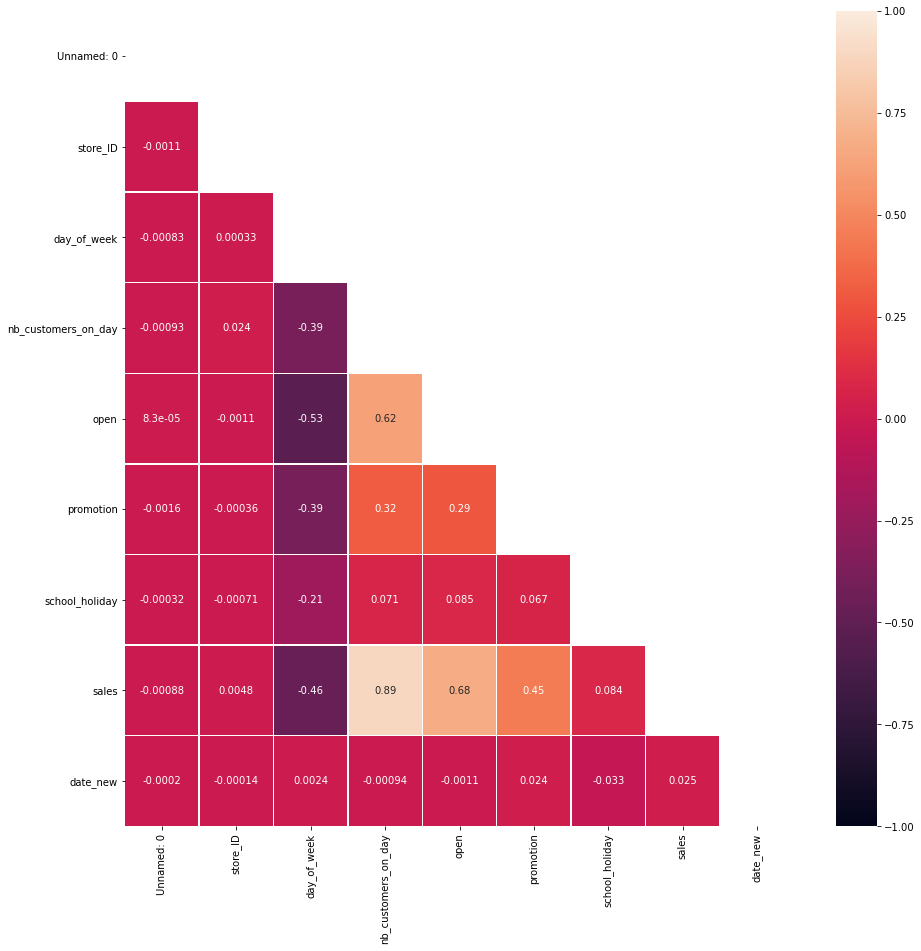

In [14]:
#Visualizing with the heatmap 

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corr, annot=True,mask=mask,linewidths=.6, vmin=-1, vmax=1)
plt.show()

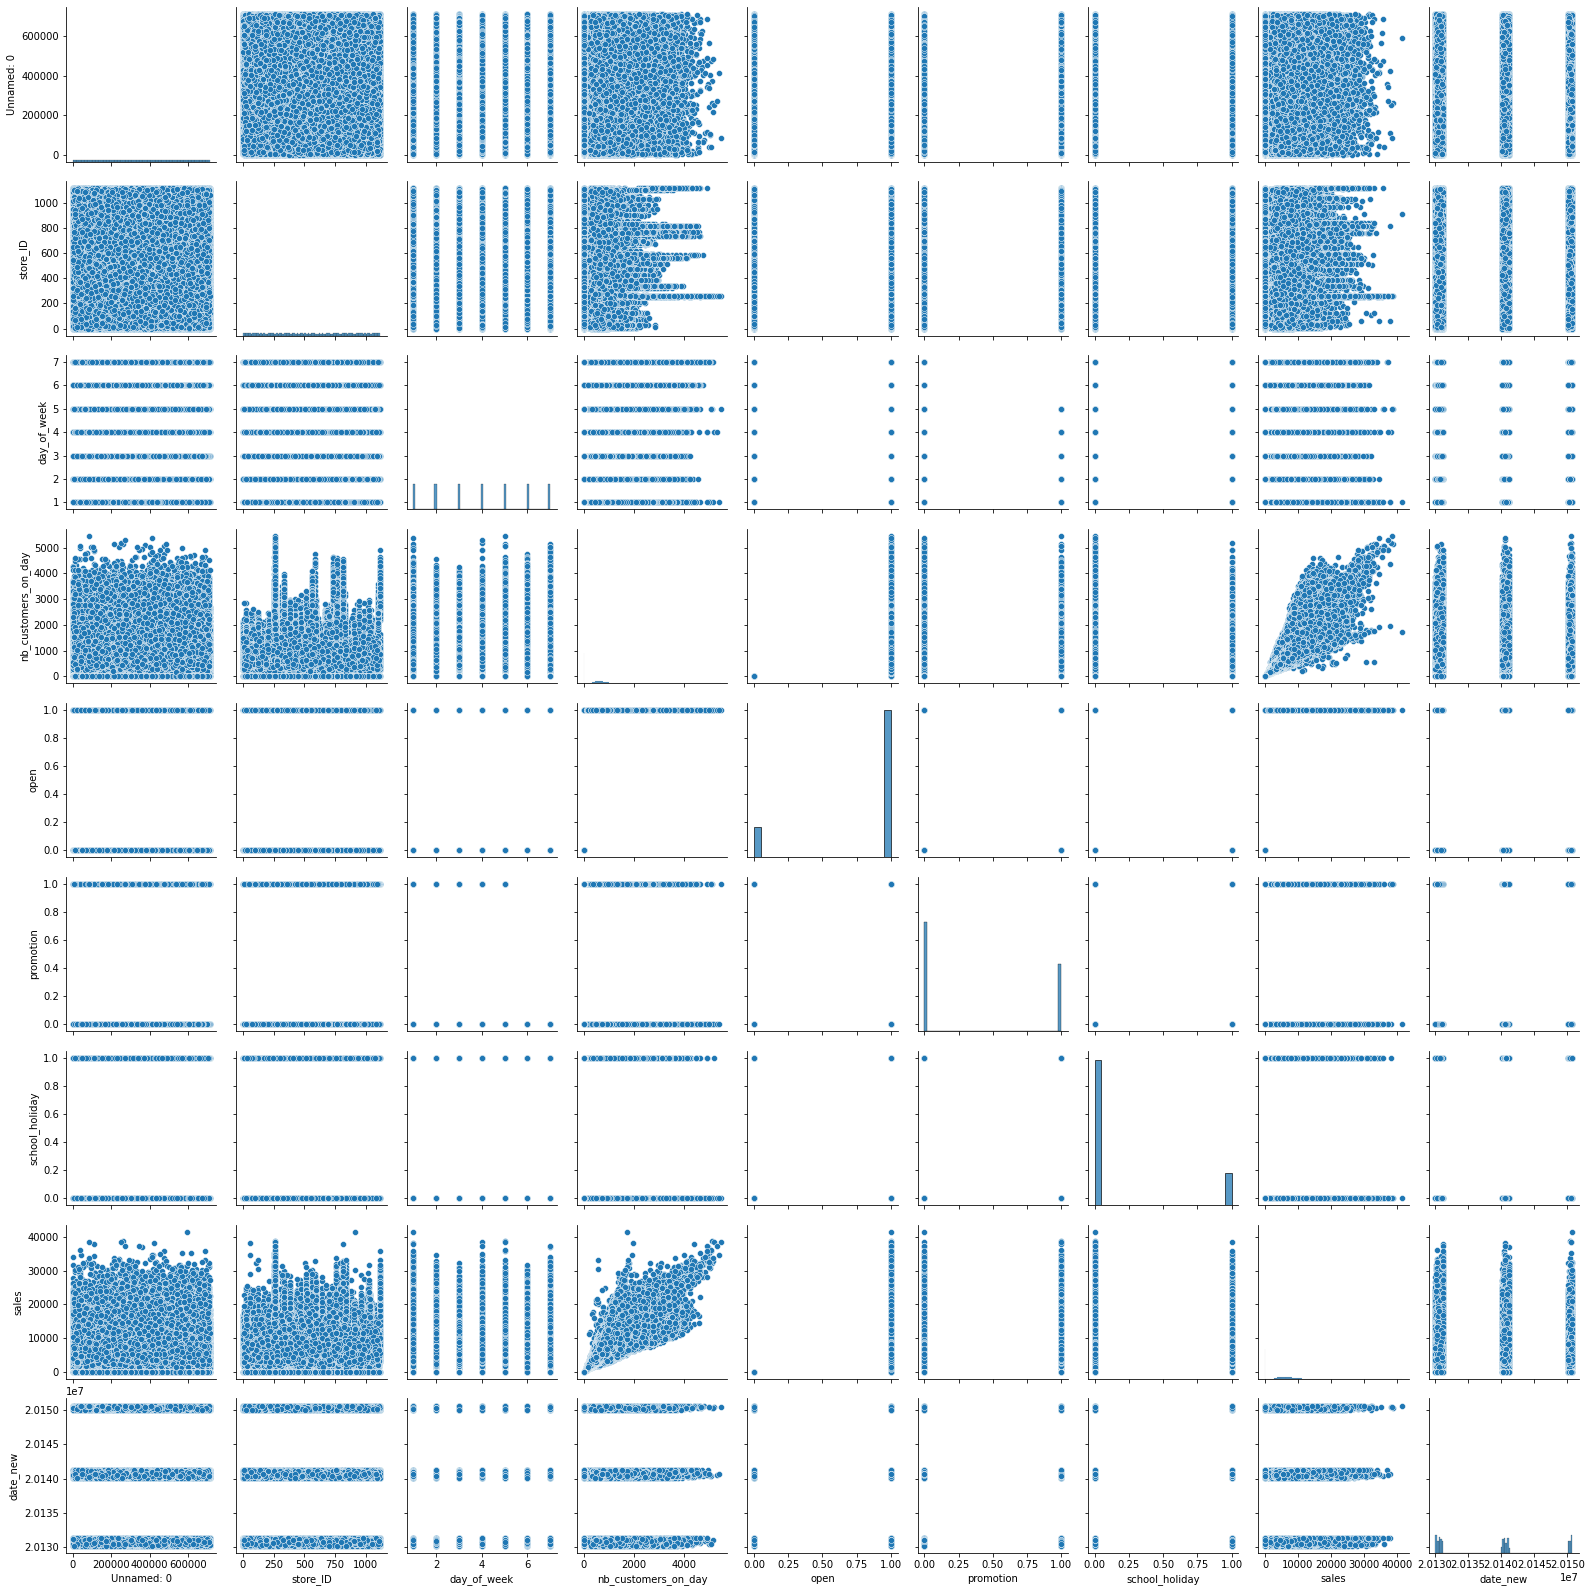

In [ ]:
#overview with the pairplots
sns.pairplot(sales)

In [ ]:
#Since it's a big dataset, we sample it to use Pycaret (we'll use Pycaret to determine the best algorithm to pick)

In [ ]:
640840*0.1

64084.0

In [ ]:
sales_sample= sales.sample(64084)
sales_sample 

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales,date_new
83867,686215,824,5,915,1,1,0,7276,20140207
2420,376438,12,5,1290,1,1,0,11173,20131220
565110,483998,641,3,456,1,0,0,4196,20130227
21858,138895,51,2,416,1,1,0,5535,20130514
393694,310290,976,7,0,0,0,0,0,20150705
...,...,...,...,...,...,...,...,...,...
410814,569496,980,2,566,1,0,1,7139,20140610
558579,339874,875,7,0,0,0,0,0,20130317
110638,141560,644,7,0,0,0,0,0,20150111
605256,444682,921,1,1223,1,0,0,9966,20140707


In [ ]:
!pip install pycaret

     |████████████████████████████████| 266kB 8.7MB/s 
     |████████████████████████████████| 1.7MB 14.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 276kB 44.7MB/s 
     |████████████████████████████████| 2.0MB 45.1MB/s 
     |████████████████████████████████| 1.4MB 30.5MB/s 
     |████████████████████████████████| 112kB 59.8MB/s 
     |████████████████████████████████| 256kB 46.7MB/s 
     |████████████████████████████████| 14.4MB 195kB/s 
     |████████████████████████████████| 81kB 13.5MB/s 
     |████████████████████████████████| 174kB 56.6MB/s 
     |████████████████████████████████| 6.8MB 39.2MB/s 
     |████████████████████████████████| 645kB 33.8MB/s 
     |████████████████████████████████| 10.1MB 32.0MB/s 
     |████████████████████████████████| 81kB 11.8M

In [ ]:
from pycaret.regression import *

setup(data=sales_sample,target='sales')


ModuleNotFoundError: ignored

In [ ]:
best= compare_models()

In [ ]:
from sklearn.model_selection import train_test_split

features = sales.drop(columns = ["sales"])
labels = sales["sales"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.25,  random_state=1)

In [ ]:
!pip install xgboost

In [ ]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_test,y_test)

# 88.85%  - pretty good R^2

[15:05:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8885392852224488

In [ ]:
y_pred = xgb_reg.predict(X_test)

y_pred

array([ 7070.352  , 11424.16   ,   188.31511, ...,  6058.903  ,
        5300.2856 ,  7332.8057 ], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))
#RMSE :  1286.331188

RMSE :  1286.331188


In [ ]:
#saving as a pickle file
import pickle

pickle.dump(xgb_reg, open('model.p', 'wb')) #name of the model used, open

In [ ]:
#X_test.to_pickle('xtest.p')
#y_test.to_pickle('ytest.p')

In [ ]:
#Runing some test to improve the score -feature engineering

In [ ]:
"""from sklearn.preprocessing import MinMaxScaler
# create normalization object from scikit learn package, and "fit" it to the features in hand
normalizer = MinMaxScaler()
# we want to use the training data to normalize (establishing maximum and minimum values) to avoid data "leakage" from the test dataset 
X_train_normalized = normalizer.fit(X_train).transform(X_train)
X_test_normalized = normalizer.fit(X_train).transform(X_test)"""

In [ ]:
"""X_train_normalized = pd.DataFrame(X_train_normalized, columns = X_train.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns = X_train.columns)
X_train_normalized.head()"""

In [ ]:
"""xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train_normalized, y_train)
xgb_reg.score(X_test_normalized,y_test)

#decreased - so no normalization - 88.81%

In [ ]:
#Let's try signal boosting 

In [ ]:
"""from sklearn.model_selection import train_test_split

features = sales[['day_of_week', 'nb_customers_on_day', 'open', 'promotion', 'school_holiday', ]]
labels = sales["sales"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.25,  random_state=1)"""

In [ ]:
#reading the file for which we'll do the prediction
vs= pd.read_csv('validation_sample.csv') 
vs.head(20)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371.0,415.0,7.0,01/03/2015,0.0,0.0,0.0,0,0.0
1,558468.0,27.0,7.0,29/12/2013,0.0,0.0,0.0,0,0.0
2,76950.0,404.0,3.0,19/03/2014,657.0,1.0,1.0,0,0.0
3,77556.0,683.0,2.0,29/01/2013,862.0,1.0,0.0,0,0.0
4,456344.0,920.0,3.0,19/03/2014,591.0,1.0,1.0,0,0.0
5,436466.0,758.0,4.0,26/06/2014,569.0,1.0,0.0,0,0.0
6,646251.0,563.0,1.0,16/02/2015,321.0,1.0,1.0,0,0.0
7,650464.0,930.0,6.0,22/11/2014,1367.0,1.0,0.0,0,0.0
8,162710.0,756.0,4.0,04/06/2015,0.0,0.0,1.0,a,0.0
9,100327.0,49.0,2.0,13/01/2015,546.0,1.0,1.0,0,0.0


In [ ]:
vs.dtypes #the types are different from the training dataset -here they are float

index                  float64
store_ID               float64
day_of_week            float64
date                    object
nb_customers_on_day    float64
open                   float64
promotion              float64
state_holiday           object
school_holiday         float64
dtype: object

In [ ]:
vs.isna() #checking for missing values

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
71200,True,True,True,True,True,True,True,True,True
71201,True,True,True,True,True,True,True,True,True
71202,True,True,True,True,True,True,True,True,True
71203,True,True,True,True,True,True,True,True,True


In [ ]:
vs=vs.dropna() # a lot of empty lines in the last lines - we drop them

In [ ]:
vs.drop(['state_holiday'],inplace=True,axis=1) #we drop state_holiday to match the training dataset

In [ ]:
vs['date_new'] = vs['date'].str.replace('\D', '').astype(int) #date is turned into a numerical variable

vs.drop(['date'],inplace=True,axis=1)

In [ ]:
#converting the float into int 
vs = vs.astype({"index": int, "store_ID":int, "day_of_week":int,  "nb_customers_on_day":int, "open":int, "promotion":int, "school_holiday":int })
vs

,index,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,date_new
0,272371,415,7,0,0,0,0,1032015
1,558468,27,7,0,0,0,0,29122013
2,76950,404,3,657,1,1,0,19032014
3,77556,683,2,862,1,0,0,29012013
4,456344,920,3,591,1,1,0,19032014
5,436466,758,4,569,1,0,0,26062014
6,646251,563,1,321,1,1,0,16022015
7,650464,930,6,1367,1,0,0,22112014
8,162710,756,4,0,0,1,0,4062015
9,100327,49,2,546,1,1,0,13012015


In [ ]:
#call index '	Unnamed: 0'

In [ ]:
vs = vs.rename(columns = {'index': 'Unnamed: 0'}, inplace = False)

In [ ]:
vs.dtypes #checking we got the types right 

Unnamed: 0             int64
store_ID               int64
day_of_week            int64
nb_customers_on_day    int64
open                   int64
promotion              int64
school_holiday         int64
date_new               int64
dtype: object

In [ ]:

X_train = vs
predf = xgb_reg.predict(X_train)
print(predf)

[   46.479794   158.06401   6775.4287    7353.352     5915.3223
  5383.1436    4260.5254   10397.108      104.86845   6299.1177
  8087.7065    4452.928      -97.97581   7505.1924    6645.759
  5371.092    12248.565     4998.471     4616.6255    8119.2417  ]


In [ ]:
vs['sales']= predf

In [ ]:
#vs[vs['open']==0]['sales']=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
vs.loc[vs.open == 0, "sales"] = 0

In [ ]:
vs

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,date_new,sales
0,272371,415,7,0,0,0,0,1032015,0
1,558468,27,7,0,0,0,0,29122013,0
2,76950,404,3,657,1,1,0,19032014,6775.43
3,77556,683,2,862,1,0,0,29012013,7353.35
4,456344,920,3,591,1,1,0,19032014,5915.32
5,436466,758,4,569,1,0,0,26062014,5383.14
6,646251,563,1,321,1,1,0,16022015,4260.53
7,650464,930,6,1367,1,0,0,22112014,10397.1
8,162710,756,4,0,0,1,0,4062015,0
9,100327,49,2,546,1,1,0,13012015,6299.12


In [ ]:
vs.head(20)

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,date_new,sales
0,272371,415,7,0,0,0,0,1032015,0
1,558468,27,7,0,0,0,0,29122013,0
2,76950,404,3,657,1,1,0,19032014,6775.43
3,77556,683,2,862,1,0,0,29012013,7353.35
4,456344,920,3,591,1,1,0,19032014,5915.32
5,436466,758,4,569,1,0,0,26062014,5383.14
6,646251,563,1,321,1,1,0,16022015,4260.53
7,650464,930,6,1367,1,0,0,22112014,10397.1
8,162710,756,4,0,0,1,0,4062015,0
9,100327,49,2,546,1,1,0,13012015,6299.12


In [ ]:
vs[vs['open']==0]

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
8,162710,756,4,04/06/2015,0,0,1,a,0
12,44740,897,7,20/04/2014,0,0,0,0,0
20,274598,1103,7,15/02/2015,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
71170,587208,346,7,27/01/2013,0,0,0,0,0
71193,138958,970,7,14/04/2013,0,0,0,0,0
71199,620934,922,4,03/10/2013,0,0,0,a,0
71200,59062,441,7,26/10/2014,0,0,0,0,0


In [ ]:
vs.to_csv("validation_sample_mod.csv") #Saving the modified validation sample file

In [ ]:
#test_final_predict = np.loadtxt("validation_sample.csv",delimiter=",") #loading the validation sample

In [ ]:
#VALIDATION FINAL!!!!!

In [ ]:
final= pd.read_csv('validation_for students.csv')  #reading the file we'll be submitting
vs.head(20)

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0
5,436466,758,4,26/06/2014,569,1,0,0,0
6,646251,563,1,16/02/2015,321,1,1,0,0
7,650464,930,6,22/11/2014,1367,1,0,0,0
8,162710,756,4,04/06/2015,0,0,1,a,0
9,100327,49,2,13/01/2015,546,1,1,0,0


In [ ]:
final.dtypes

index                   int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
dtype: object

In [ ]:
final.isna()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
71200,False,False,False,False,False,False,False,False,False
71201,False,False,False,False,False,False,False,False,False
71202,False,False,False,False,False,False,False,False,False
71203,False,False,False,False,False,False,False,False,False


In [ ]:
final.shape

(71205, 9)

In [ ]:
final.drop(['state_holiday'],inplace=True,axis=1)

In [ ]:
final['date_new'] = final['date'].str.replace('\D', '').astype(int)

final.drop(['date'],inplace=True,axis=1)

In [ ]:
final.head()

,index,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,date_new
0,272371,415,7,0,0,0,0,1032015
1,558468,27,7,0,0,0,0,29122013
2,76950,404,3,657,1,1,0,19032014
3,77556,683,2,862,1,0,0,29012013
4,456344,920,3,591,1,1,0,19032014


In [ ]:
#converting the 
final = final.astype({"index": int, "store_ID":int, "day_of_week":int,  "nb_customers_on_day":int, "open":int, "promotion":int, "school_holiday":int })
final

,index,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,date_new
0,272371,415,7,0,0,0,0,1032015
1,558468,27,7,0,0,0,0,29122013
2,76950,404,3,657,1,1,0,19032014
3,77556,683,2,862,1,0,0,29012013
4,456344,920,3,591,1,1,0,19032014
...,...,...,...,...,...,...,...,...
71200,59062,441,7,0,0,0,0,26102014
71201,687449,377,7,0,0,0,0,18082013
71202,207393,15,3,648,1,0,0,11062014
71203,233378,950,2,626,1,1,0,23042013


In [ ]:
final = final.rename(columns = {'index': 'Unnamed: 0'}, inplace = False)

In [ ]:
final.dtypes

Unnamed: 0             int64
store_ID               int64
day_of_week            int64
nb_customers_on_day    int64
open                   int64
promotion              int64
school_holiday         int64
date_new               int64
dtype: object

In [ ]:
X_train = final
prediction = xgb_reg.predict(X_train)
print(prediction)

[  46.479794  158.06401  6775.4287   ... 5369.7236   6966.7397
 8188.183   ]


In [ ]:
final['sales']= prediction

In [ ]:
final

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,date_new,sales
0,272371,415,7,0,0,0,0,1032015,46.479794
1,558468,27,7,0,0,0,0,29122013,158.064011
2,76950,404,3,657,1,1,0,19032014,6775.428711
3,77556,683,2,862,1,0,0,29012013,7353.352051
4,456344,920,3,591,1,1,0,19032014,5915.322266
...,...,...,...,...,...,...,...,...,...
71200,59062,441,7,0,0,0,0,26102014,111.664886
71201,687449,377,7,0,0,0,0,18082013,46.479794
71202,207393,15,3,648,1,0,0,11062014,5369.723633
71203,233378,950,2,626,1,1,0,23042013,6966.739746


In [ ]:
final.loc[final.open == 0, "sales"] = 0

In [ ]:
final

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,date_new,sales
0,272371,415,7,0,0,0,0,1032015,0.000000
1,558468,27,7,0,0,0,0,29122013,0.000000
2,76950,404,3,657,1,1,0,19032014,6775.428711
3,77556,683,2,862,1,0,0,29012013,7353.352051
4,456344,920,3,591,1,1,0,19032014,5915.322266
...,...,...,...,...,...,...,...,...,...
71200,59062,441,7,0,0,0,0,26102014,0.000000
71201,687449,377,7,0,0,0,0,18082013,0.000000
71202,207393,15,3,648,1,0,0,11062014,5369.723633
71203,233378,950,2,626,1,1,0,23042013,6966.739746


In [ ]:
final[final['open']==0]

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,date_new,sales
0,272371,415,7,0,0,0,0,1032015,0.0
1,558468,27,7,0,0,0,0,29122013,0.0
8,162710,756,4,0,0,1,0,4062015,0.0
12,44740,897,7,0,0,0,0,20042014,0.0
20,274598,1103,7,0,0,0,0,15022015,0.0
...,...,...,...,...,...,...,...,...,...
71170,587208,346,7,0,0,0,0,27012013,0.0
71193,138958,970,7,0,0,0,0,14042013,0.0
71199,620934,922,4,0,0,0,0,3102013,0.0
71200,59062,441,7,0,0,0,0,26102014,0.0


In [ ]:
final= final[['Unnamed: 0','sales']]
final

,Unnamed: 0,sales
0,272371,0.000000
1,558468,0.000000
2,76950,6775.428711
3,77556,7353.352051
4,456344,5915.322266
...,...,...
71200,59062,0.000000
71201,687449,0.000000
71202,207393,5369.723633
71203,233378,6966.739746


In [ ]:
final

,Unnamed: 0,sales
0,272371,0.000000
1,558468,0.000000
2,76950,6775.428711
3,77556,7353.352051
4,456344,5915.322266
...,...,...
71200,59062,0.000000
71201,687449,0.000000
71202,207393,5369.723633
71203,233378,6966.739746


In [ ]:
final = final.rename(columns = {'Unnamed: 0':'index'}, inplace = False)
final

,index,sales
0,272371,0.000000
1,558468,0.000000
2,76950,6775.428711
3,77556,7353.352051
4,456344,5915.322266
...,...,...
71200,59062,0.000000
71201,687449,0.000000
71202,207393,5369.723633
71203,233378,6966.739746


In [ ]:
final.set_index('index', inplace = True)
final

,sales
index,
272371,0.000000
558468,0.000000
76950,6775.428711
77556,7353.352051
456344,5915.322266
...,...
59062,0.000000
687449,0.000000
207393,5369.723633


In [ ]:
final.to_csv("output_sample_sales.csv") 